In [83]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import copy as cp

from rayopt import *
from rayopt import zemax

np.set_printoptions(precision=3)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [84]:
d = requests.get("http://www.lens-designs.com/MicroscopeObjectives/US06507442-1.zmx")
d.encoding = "utf-16"

/home/rj/work/nist/pyrayopt/rayopt/elements.py:134: RuntimeWarning: invalid value encountered in multiply
  self._offset = o = d*u
/home/rj/work/nist/pyrayopt/rayopt/paraxial_trace.py:241: RuntimeWarning: divide by zero encountered in true_divide
  return self.n.take((0, -2))/(2*na)
/home/rj/work/nist/pyrayopt/rayopt/paraxial_trace.py:246: RuntimeWarning: divide by zero encountered in true_divide
  return 1.22*self.l/(2*na)/self.system.scale
/home/rj/work/nist/pyrayopt/rayopt/elements.py:208: RuntimeWarning: invalid value encountered in less_equal
  good = np.square(y[:, :2]).sum(1) <= self.radius**2
/home/rj/work/nist/pyrayopt/rayopt/analysis.py:399: RuntimeWarning: invalid value encountered in true_divide
  xd = (a[1] - h)/h
/home/rj/work/nist/pyrayopt/rayopt/analysis.py:415: RuntimeWarning: invalid value encountered in true_divide
  z = -t.y[-1, :, 1]/tanarcsin(t.i[-1])[:, 1]
/usr/lib/python3/dist-packages/matplotlib/collections.py:631: FutureWarning: elementwise comparison failed; 

PARB not handled 34 2 0 1 0 0 0 1 0 0
System: 
Scale: 1.0 mm
Wavelengths: 248, 249, 247 nm
Object:
 Index: 1
 Entrance: 3.4 dia at 5
 Pupil: 3.1 dia at 13.8
 Semi-Angle: 1.7
Image:
 Index: 1
 Entrance: 1.29 dia at 0.365
 Pupil: 1.68 dia at -0.99
 Radius: 0.0541
 NA: -0.648
Stop: 8
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf          4         basic/air   1.000   1.000   89.30
 1 S          5      2.301        3.4 INFRARED/F_SILICA   1.509   1.458   67.82
 2 S       1.84       1.69        2.4         basic/air   1.000   1.000   89.30
 3 S        1.1     -1.961        2.4     INFRARED/CAF2   1.468   1.434   94.99
 4 S          4     -2.317        3.6         basic/air   1.000   1.000   89.30
 5 S       0.15     -2.161     3.3249 INFRARED/F_SILICA   1.509   1.458   67.82
 6 S          4      7.967     5.7661         basic/air   1.000   1.000   89.30
 7 S       0.14       8.91     5.3359     INFRARED/CAF2   1.468   1.

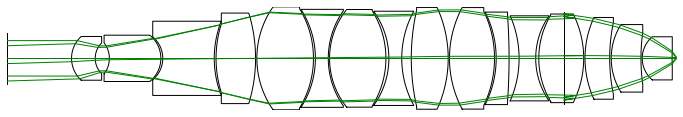

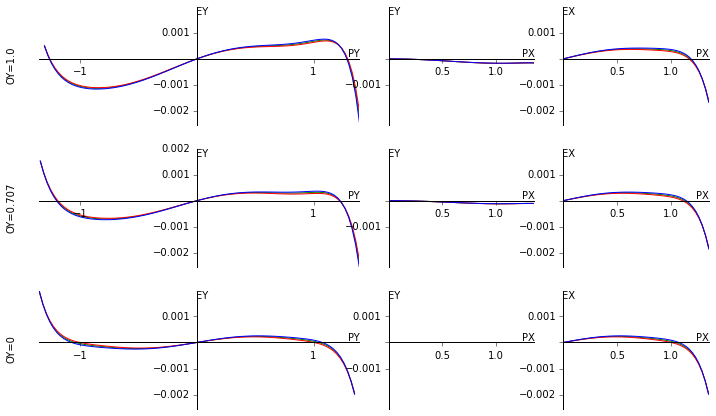

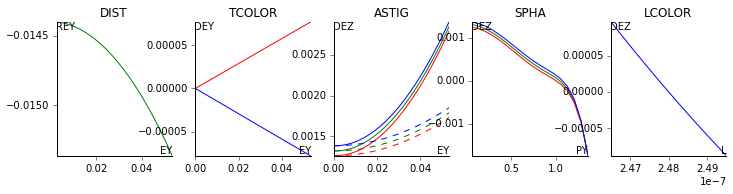

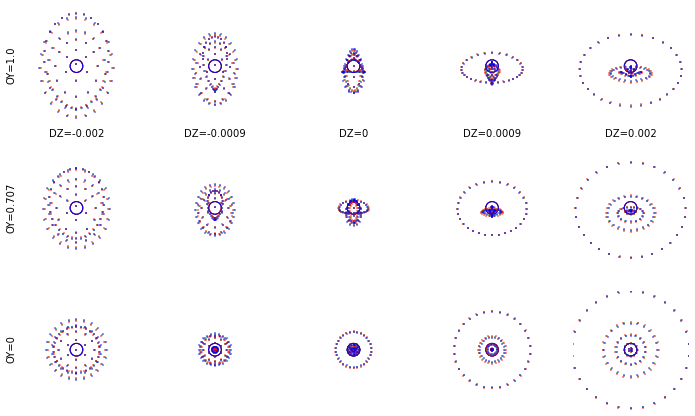

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


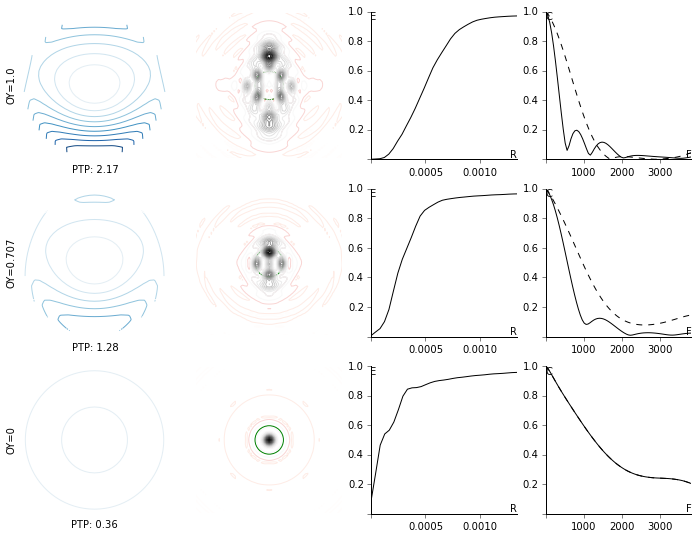

In [3]:
s = zemax.zmx_to_system(d.text)
s.object = InfiniteConjugate(angle=np.deg2rad(1.7))
s.wavelengths = 248e-9, 249e-9, 247e-9,
s.stop = 8
s.aperture.radius *= .9
del s[0]
s[0].radius = 2.
s[1].radius = 1.7
s[1].distance = 5.
s[2].radius = 1.2
s[3].radius = 1.2
#del s[27]
#s[27].distance = 0.1
s[-1].distance += 3.7e-3
a = Analysis(s, resize=False, refocus_paraxial=False, refocus_full=False)

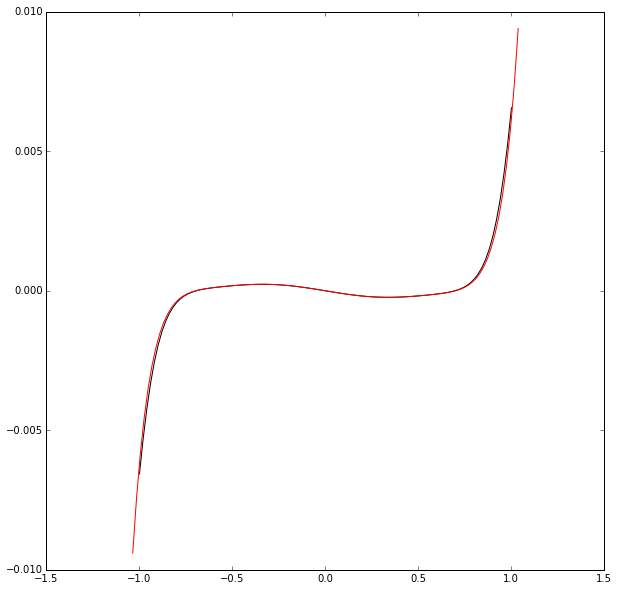

In [4]:
import importlib
import rayopt.poly_trace
importlib.reload(rayopt.poly_trace)
PolyTrace = rayopt.poly_trace.PolyTrace

g = GeometricTrace(s)
o = PolyTrace(s, 7)

z, m = s.pupil((0, 1))
pu = (m[1, 1] - m[0, 1])/2/s.object.pupil_radius

ss = np.linspace(-1, 1, 101)  # aperture
tt = 0.*np.ones_like(ss)  # field
fig, ax = plt.subplots(figsize=(10, 10))

g.rays((0, tt[0]), np.c_[np.zeros_like(ss), ss], s.wavelengths[0], filter=False)
ax.plot(-ss, g.y[-1, :, 1], "k")
ax.plot(-ss/pu, o.evaluate(ss[:, None], tt[:, None]), "r")
#ax.set_ylim(-1, 1)

In [5]:
print(o)

maximum order: 7
wavelength: 248

s1 : -1.25321e-03
s2 :  1.10795e-02
s3 :  3.47106e-01
s4 : -4.81955e-02
s5 :  1.98715e+00
m1 :  7.03497e-04
m2 : -1.69008e-02
m3 : -1.14882e-02
m4 : -4.15701e-02
m5 :  7.64142e-04
m6 : -4.69960e-02
m7 : -2.48170e-01
m8 : -2.52181e-01
m9 :  8.97293e-02
m10:  7.31617e+00
m11:  1.15306e+00
m12:  2.44402e+01

s1100: spherical aberration                 : -1.25321e-03
t1100: sagittal coma                        : -1.10795e-02
s2010: field curvature                      :  2.98910e-01
t2010: distortion                           : -1.98715e+00
s3001: meridional coma                      : -2.21985e-02
t3001: field curvature                      :  6.94211e-01
s4200: spherical aberration                 :  7.03497e-04
t4200: circular coma                        :  5.41258e-03
s5110: sagittal oblique spherical aberration:  7.64142e-04
t5110: meridional elliptical coma           : -4.01108e-03
s6101: circular coma                        :  2.29764e-02
t6101: obl